# Blur detection with OpenCV

In the paper, "Analysis of focus measure operators for shape from focus" 36 different methods to estimate the focus measure of an image are mentioned.

In case of signal processing, the first method to be considered would be computing the Fast Fourier Transform of the image and then examining the distribution of low and high frequencies - if there are a low amount of high frequencies then the image is considered blurry.

However, defining what is a low number of high frequencies and what is a high number of high frequencies can be quite problematic, often leading to sub-par results.

It would be better to consider an approach where a single floating point value could be used to represent the level of blurryness of an image.

Pertuz et al. reviewed many methods to compute this "blurryness metric", some of them simple and straightforward using just basic grayscale pixel intensity statistics, others more advanced and feature-based, evaluating the Local Binary Patterns of an image.

Variation of Laplacian by Pech-Pacheo et al. in their 2000 IPCR paper, "Diatom autofocusing in brightfield microscopy: a comparitive study".

Simply, a single channel of an image (persumably grayscale) is to be taken and is to be convolved with a 3 x 3 kernel and then the variance (i.e. standard deviation squared) of the response is to be taken.
If the variance falls below a pre-defined threshold, then the image is considered blurry; otherwise, it is not blurry.

The reason this method works is due to the definition of Laplacian operator itself, which is used to measure the 2nd derivative of an image. 
The Laplacian highlights regions of an image containing rapid intensity changes, much like the Sobel and Scharr operators.
And just like these operators, the Laplacian is often used for edge detection, the assumption here is that if an image contains high variance then there is a wide spread of responses, both edge-like and non-edge like, representative of a normal, in-focus image. BUt if there is very low variance, then there is a tiny spread of responses, indicating there are very little edges in the image. As we know, the more an image is blurred, the less edges there are.

The trick here is setting the correct threshold which can be quite domain dependent. Too low of a threshold the image will be incorrectly marked as blurry even if they are not. Too high of a threshold then images that are actually blurry will not be marked as blurry.
This method tends to work best in environments where an acceptable focus measure range can be computed and outliers can be detected.

In [1]:
# import the neccessary packages
import cv2
import os

In [2]:
def variance_of_laplacian(image):
    # compute the laplacian of the image and then return the focus
    # measure, which is smple the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var() # convolution of the image with a 3 x 3 Laplacian operator and returns the variance

In [9]:
folder = 'blur_images'
path = os.path.join(os.getcwd(), folder)

image_li = []
thresh = int(input("Enter the threshold value: ")) # fixed threshold for the program
# thresh = focus measures that fall below this value will be considered 'blurry'
bi = os.listdir(path)
for i in bi:
    temp_path = os.path.join(path, i)
    image = cv2.imread(temp_path)
    image_li.append(image)

print(len(image_li))

Enter the threshold value: 800
12


In [10]:
blur_detection = []
for i in range(len(image_li)):
    image = image_li[i]
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = variance_of_laplacian(gray)
    text = "Not Blurry"
    
    # if the focus measure is less than the supplied threshold,
    # then the image should be considered "blurry"
    
    if fm < thresh:
        text = "Blurry"
    
    # show the image
    copy = image.copy()
    cv2.putText(copy, "{}: {:.2f}" .format(text, fm), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    blur_detection.append(copy)


print(len(blur_detection))
        

12


In [5]:
import matplotlib.pyplot as plt

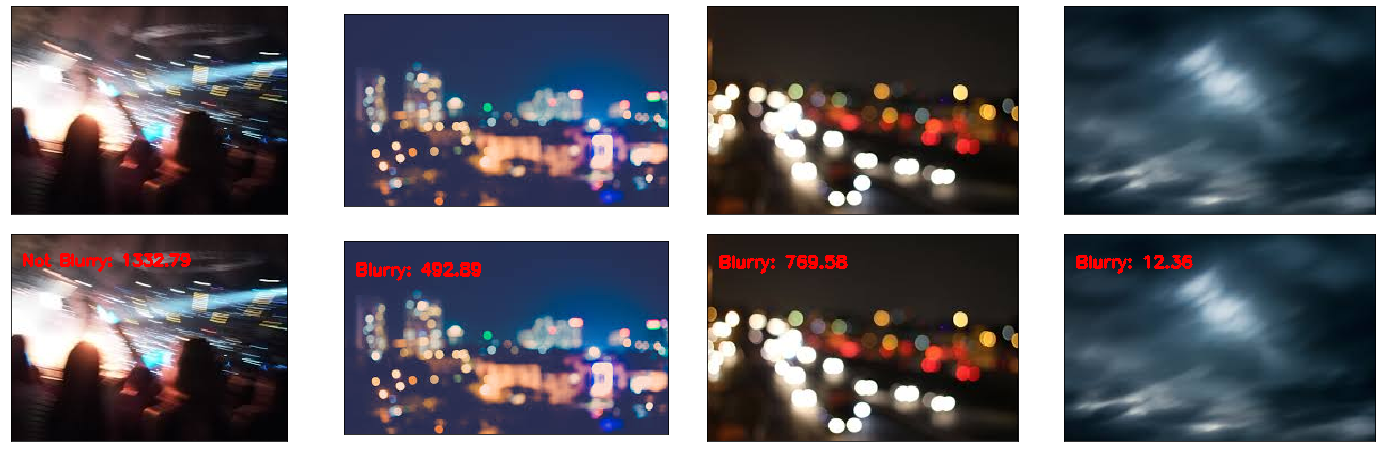

In [11]:
try:
    fig, ax = plt.subplots(2, 4, figsize=(25, 8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
    j = 0
    for i in range(0,4):
        temp_image = cv2.cvtColor(image_li[j], cv2.COLOR_BGR2RGB)
        blur_image = cv2.cvtColor(blur_detection[j], cv2.COLOR_BGR2RGB)
        ax[0, i].imshow(temp_image)
        ax[1, i].imshow(blur_image)
        j += 1

except Exception as e:
    print(e)

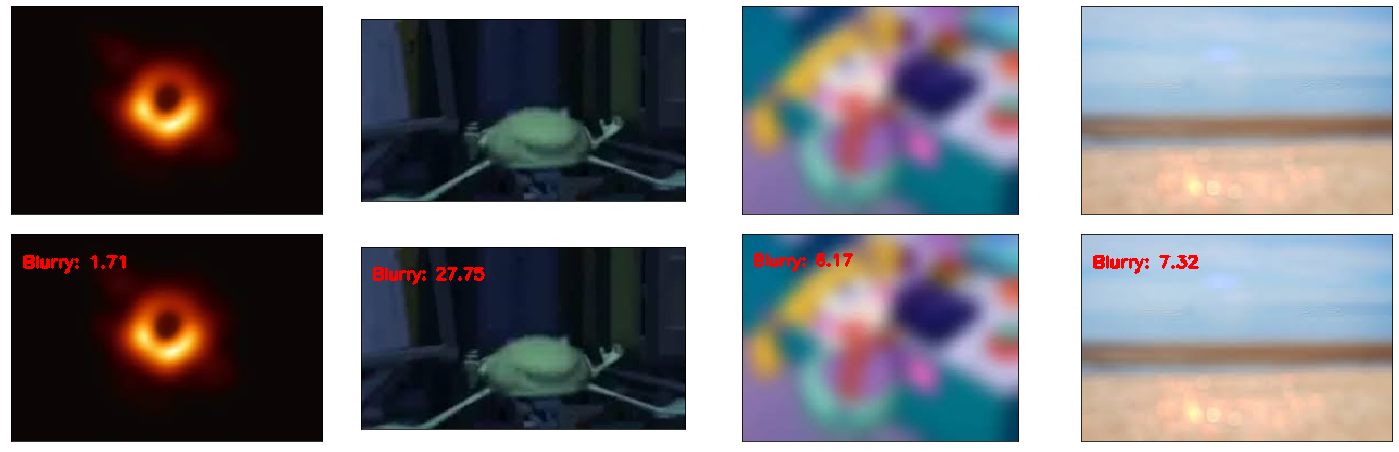

In [12]:
try:
    fig, ax = plt.subplots(2, 4, figsize=(25, 8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
    j = 4
    for i in range(0,4):
        temp_image = cv2.cvtColor(image_li[j], cv2.COLOR_BGR2RGB)
        blur_image = cv2.cvtColor(blur_detection[j], cv2.COLOR_BGR2RGB)
        ax[0, i].imshow(temp_image)
        ax[1, i].imshow(blur_image)
        j += 1

except Exception as e:
    print(e)

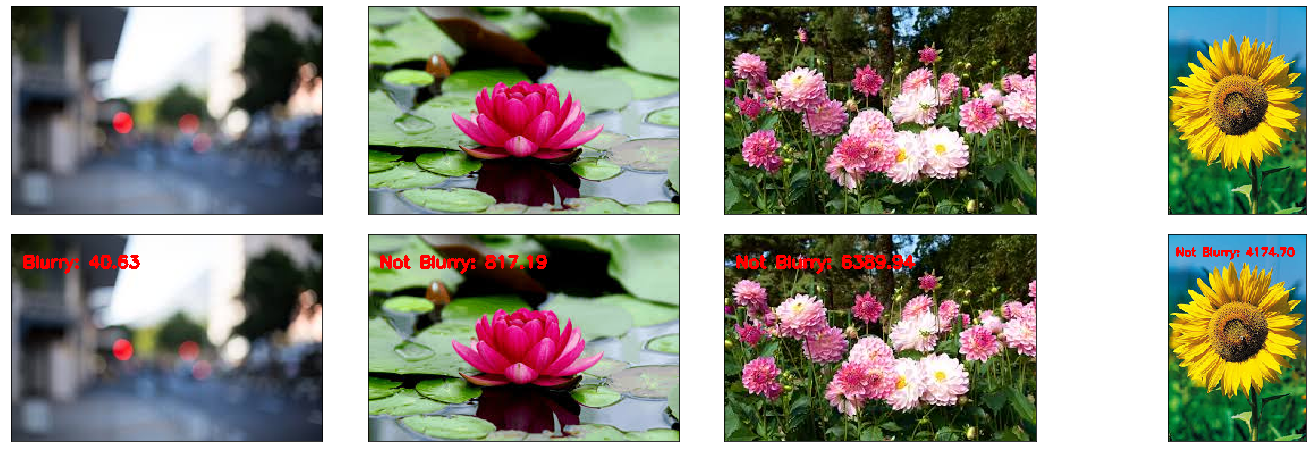

In [13]:
try:
    fig, ax = plt.subplots(2, 4, figsize=(25, 8),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
    j = 8
    for i in range(0,4):
        temp_image = cv2.cvtColor(image_li[j], cv2.COLOR_BGR2RGB)
        blur_image = cv2.cvtColor(blur_detection[j], cv2.COLOR_BGR2RGB)
        ax[0, i].imshow(temp_image)
        ax[1, i].imshow(blur_image)
        j += 1

except Exception as e:
    print(e)

### Result: An appropriate threshold needs to be calculated for accurate result.
